In [1]:
# 1) Generacja danych spiralnych (2D, 2 klasy)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)  # dla powtarzalności wyników

def make_spiral(n_per_class=500, noise=0.05, twist=4*np.pi, offset=np.pi+0.3):
    # Kąt rosnący od 0 do 'twist' (np. 4π → 2 pełne obroty spirali)
    theta = np.linspace(0, twist, n_per_class)
    # Promień rosnący od środka (spirala rozwija się na zewnątrz)
    r = np.linspace(0.0, 1.5, n_per_class)

    # --- Spirala klasy 0 ---
    x0 = r * np.cos(theta) + noise * np.random.randn(n_per_class)  # współrzędna X + szum
    y0 = r * np.sin(theta) + noise * np.random.randn(n_per_class)  # współrzędna Y + szum
    c0 = np.zeros(n_per_class, dtype=np.int64)  # etykiety = 0

    # --- Spirala klasy 1 (przesunięta o 'offset') ---
    x1 = r * np.cos(theta + offset) + noise * np.random.randn(n_per_class)
    y1 = r * np.sin(theta + offset) + noise * np.random.randn(n_per_class)
    c1 = np.ones(n_per_class, dtype=np.int64)   # etykiety = 1

    # Łączenie danych w jedną macierz cech X i wektor etykiet y
    X = np.vstack([np.c_[x0, y0], np.c_[x1, y1]]).astype(np.float32)  # shape: (2*n_per_class, 2)
    y = np.concatenate([c0, c1])  # shape: (2*n_per_class,)
    return X, y

# Test: wygeneruj 2 spirale po 400 punktów
X, y = make_spiral(n_per_class=400, noise=0.05)

# Podział na zbiór treningowy i testowy (z zachowaniem proporcji klas)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

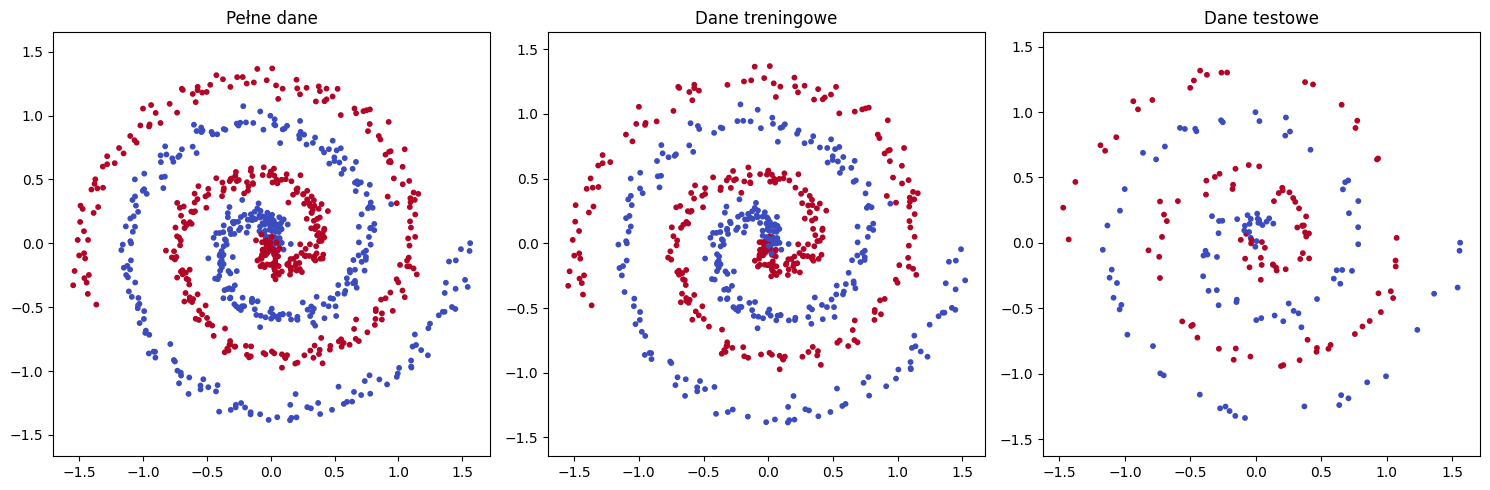

In [2]:
# 2) Wykres punktowy (scatter) danych uczących

# Rysowanie obok siebie
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Wszystkie dane
axes[0].scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", s=10)
axes[0].set_title("Pełne dane")
axes[0].axis("equal")

# Dane treningowe
axes[1].scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="coolwarm", s=10)
axes[1].set_title("Dane treningowe")
axes[1].axis("equal")

# Dane testowe
axes[2].scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="coolwarm", s=10)
axes[2].set_title("Dane testowe")
axes[2].axis("equal")

plt.tight_layout()
plt.show()


In [3]:
# Helper: 6) rysowanie granicy decyzyjnej dla funkcji predykcyjnej
from typing import Callable

def plot_decision_boundary(predict_fn: Callable[[np.ndarray], np.ndarray], X, y, title="Boundary"):
    # Siatka punktów na obszarze danych
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()].astype(np.float32)

    # Predykcja klas na siatce
    zz = predict_fn(grid).reshape(xx.shape)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, zz, levels=1, alpha=0.25, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=10, edgecolor="k", linewidth=0.1)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.tight_layout()
    plt.show()


In [4]:
# 2 - 8 - 8 - 1

In [8]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

In [16]:
model_keras  = keras.Sequential(
    [
        layers.Input(shape=(2,)),
        layers.Dense(8, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
        
        
    ]
)

model_keras.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

hist = model_keras.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=1000, 
    batch_size=64
)
    

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4900 - loss: 0.6939 - val_accuracy: 0.5800 - val_loss: 0.6890
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6217 - loss: 0.6823 - val_accuracy: 0.6500 - val_loss: 0.6824
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6083 - loss: 0.6737 - val_accuracy: 0.6650 - val_loss: 0.6749
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6567 - loss: 0.6666 - val_accuracy: 0.6700 - val_loss: 0.6721
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6683 - loss: 0.6610 - val_accuracy: 0.6600 - val_loss: 0.6721
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6583 - loss: 0.6576 - val_accuracy: 0.6550 - val_loss: 0.6682
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6633 - loss: 0.6508 - val_accuracy: 0.6600 - val_loss: 0.6621
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6750 - loss: 0.6467 - val_accuracy: 0

In [17]:
keras_test_probs = model_keras.predict(X_test, verbose=0).ravel()
keras_test_pred = (keras_test_probs >= 0.5).astype(np.int64)

# keras_test_pred

In [18]:
keras_acc = (keras_test_pred == y_test).mean()
keras_acc

0.955

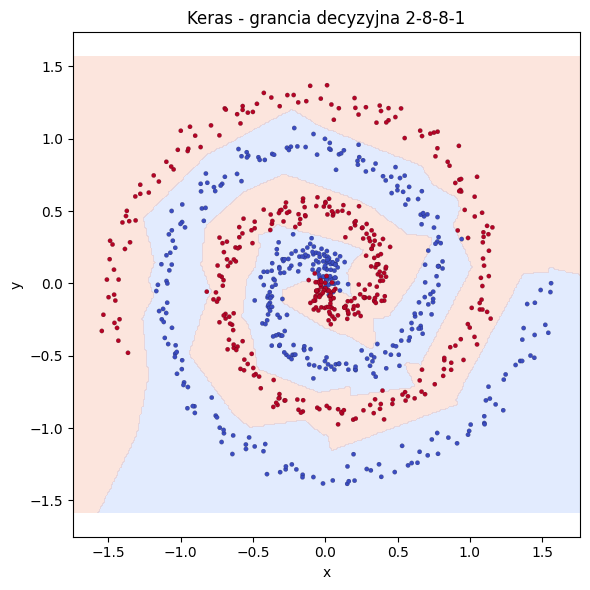

In [19]:
plot_decision_boundary(
    predict_fn=lambda pts: (model_keras.predict(pts, verbose=0).ravel() >= 0.5).astype(np.int64),
    X=X, y=y, title="Keras - grancia decyzyjna 2-8-8-1"
)

In [20]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

In [21]:
torch.manual_seed(42)


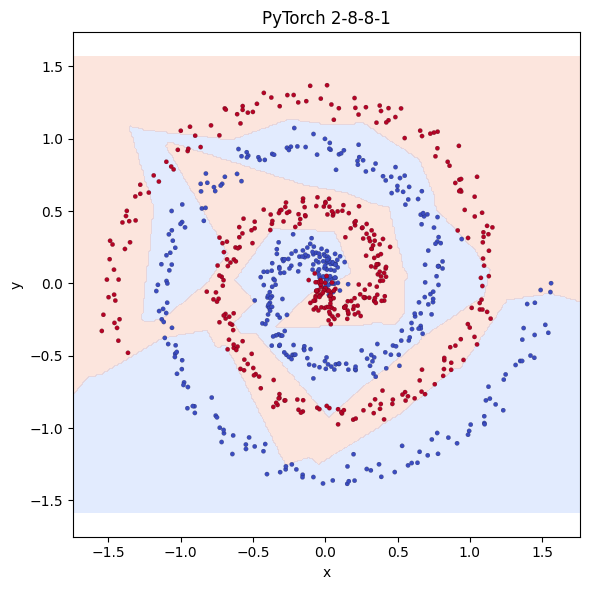

In [27]:
class SpiraleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(), 
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.layers(x)


model_torch = SpiraleNet()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_torch.parameters(), lr=0.01)

X_train_t = torch.from_numpy(X_train)
y_train_t = torch.from_numpy(y_train.astype(np.float32)).view(-1, 1)

X_test_t = torch.from_numpy(X_test)
y_test_t = torch.from_numpy(y_test.astype(np.float32)).view(-1, 1)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, shuffle=True)

model_torch.train()
for epoch in range(1000):
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits = model_torch(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

model_torch.eval()
with torch.no_grad():
    logits = model_torch(X_test_t)
    probs = torch.sigmoid(logits)
    pred = (probs >= 0.5).long().numpy()


def predict_fn(pts):
    with torch.no_grad():
        logits = model_torch(torch.from_numpy(pts))
        probs = torch.sigmoid(logits).squeeze(1).numpy()
    return (probs >= 0.5).astype(np.int64)

plot_decision_boundary(
    predict_fn=predict_fn,
    X=X, y=y, title="PyTorch 2-8-8-1")


PyTorch — accuracy (test): 0.940


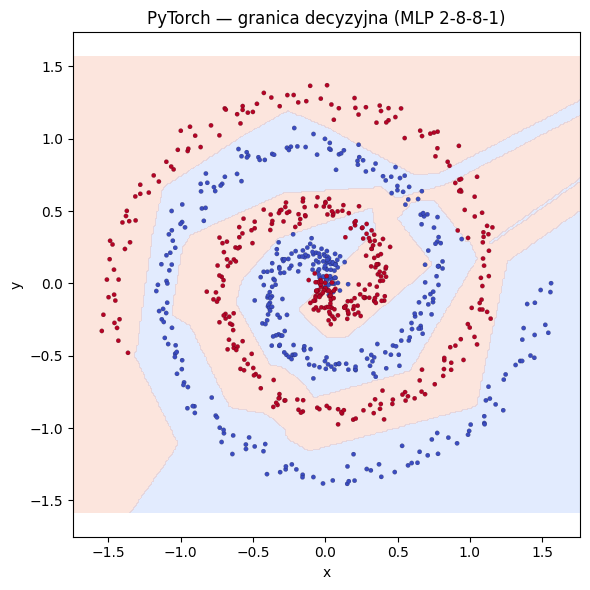

In [28]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(42)

# 3) Model PyTorch (logity, bez sigmoid w forward)
class SpiralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 8),
            nn.ReLU(),
            nn.Linear(8, 1),  # 1 logit
        )
    def forward(self, x):
        return self.layers(x)

model_torch = SpiralNet()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_torch.parameters(), lr=1e-2,  eps=1e-7)  # poprawa eps

# Dane do tensora/dataloaderów
Xtr_t = torch.from_numpy(X_train)
ytr_t = torch.from_numpy(y_train.astype(np.float32)).view(-1, 1)  # kształt (N,1)
Xte_t = torch.from_numpy(X_test)
yte_t = torch.from_numpy(y_test.astype(np.float32)).view(-1, 1)

train_loader = DataLoader(TensorDataset(Xtr_t, ytr_t), batch_size=64, shuffle=True)

# poprawa wag
def init_weights(m):
   if isinstance(m, nn.Linear):
       nn.init.xavier_uniform_(m.weight)   # tak jak w Keras Dense
       nn.init.zeros_(m.bias)
model_torch.apply(init_weights)

def train(model, optimizer, criterion):
    # 4) Trening pętla
    model_torch.train()
    for epoch in range(500):
        for xb, yb in train_loader:
            optimizer.zero_grad()
            logits = model_torch(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()

train(model_torch, optimizer, criterion)

# 5) Predykcja i accuracy na teście
model_torch.eval()
with torch.no_grad():
    logits = model_torch(Xte_t).squeeze(1)
    probs = torch.sigmoid(logits)
    pred = (probs >= 0.5).long().numpy()
acc_torch = (pred == y_test).mean()
print(f"PyTorch — accuracy (test): {acc_torch:.3f}")


def predict_fn(pts):
    with torch.no_grad():
        logits = model_torch(torch.from_numpy(pts))
        probs = torch.sigmoid(logits).squeeze(1).numpy()
    return (probs >= 0.5).astype(np.int64)

plot_decision_boundary(
    predict_fn=predict_fn,
    X=X, y=y, title="PyTorch — granica decyzyjna (MLP 2-8-8-1)"
)


PyTorch — accuracy (test): 0.540


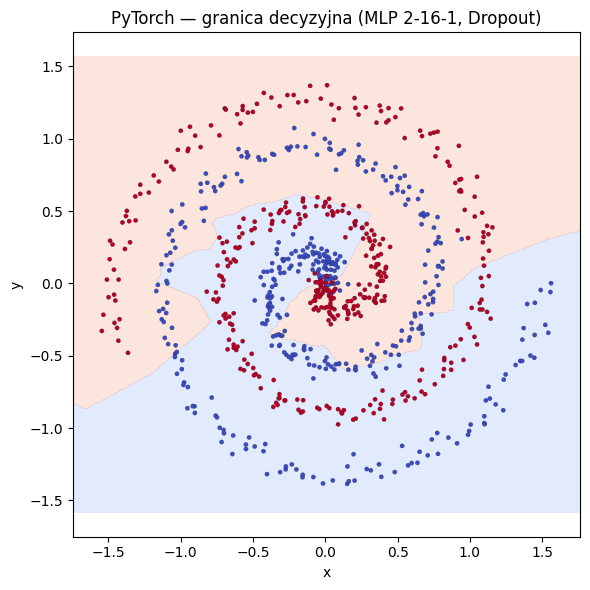

In [39]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

torch.manual_seed(42)

# Model z jedną warstwą ukrytą + regularyzacja (Dropout)
class SpiralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 64),   # wejście -> 16 neuronów
            nn.ReLU(),
            # nn.Dropout(0.3),    # regularyzacja
            nn.BatchNorm1d(64),
            nn.Linear(64, 1)    # wyjście: 1 logit
        )
    def forward(self, x):
        return self.layers(x)

model_torch = SpiralNet()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_torch.parameters(), lr=1e-2, eps=1e-7)

# Dane do tensora/dataloaderów
Xtr_t = torch.from_numpy(X_train).float()
ytr_t = torch.from_numpy(y_train.astype(np.float32)).view(-1, 1)
Xte_t = torch.from_numpy(X_test).float()
yte_t = torch.from_numpy(y_test.astype(np.float32)).view(-1, 1)

train_loader = DataLoader(TensorDataset(Xtr_t, ytr_t), batch_size=64, shuffle=True)

# inicjalizacja wag (Xavier)
def init_weights(m):
   if isinstance(m, nn.Linear):
       nn.init.xavier_uniform_(m.weight)
       nn.init.zeros_(m.bias)

model_torch.apply(init_weights)

# Pętla treningowa
def train(model, optimizer, criterion, epochs=300):
    model.train()
    for epoch in range(epochs):
        for xb, yb in train_loader:
            optimizer.zero_grad()
            logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()




train(model_torch, optimizer, criterion)

# Ewaluacja
model_torch.eval()
with torch.no_grad():
    logits = model_torch(Xte_t).squeeze(1)
    probs = torch.sigmoid(logits)
    pred = (probs >= 0.5).long().numpy()

acc_torch = (pred == y_test).mean()
print(f"PyTorch — accuracy (test): {acc_torch:.3f}")

# Predykcja do granicy decyzyjnej
def predict_fn(pts):
    with torch.no_grad():
        logits = model_torch(torch.from_numpy(pts).float())
        probs = torch.sigmoid(logits).squeeze(1).numpy()
    return (probs >= 0.5).astype(np.int64)

plot_decision_boundary(
    predict_fn=predict_fn,
    X=X, y=y, title="PyTorch — granica decyzyjna (MLP 2-16-1, Dropout)"
)
